# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

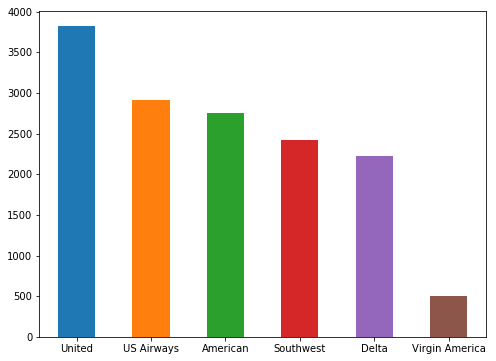

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

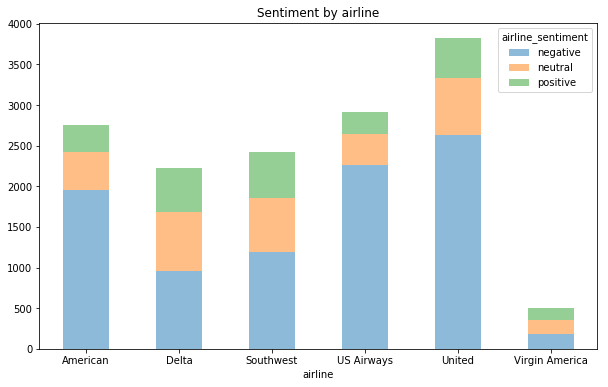

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

C:\Users\PACHO\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

y.describe()
X[0:10]

tweet_id
570306133677760513                  @VirginAmerica What @dhepburn said.
570301130888122368    @VirginAmerica plus you've added commercials t...
570301083672813571    @VirginAmerica I didn't today... Must mean I n...
570301031407624196    @VirginAmerica it's really aggressive to blast...
570300817074462722    @VirginAmerica and it's a really big bad thing...
570300767074181121    @VirginAmerica seriously would pay $30 a fligh...
570300616901320704    @VirginAmerica yes, nearly every time I fly VX...
570300248553349120    @VirginAmerica Really missed a prime opportuni...
570299953286942721      @virginamerica Well, I didn't…but NOW I DO! :-D
570295459631263746    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object

In [37]:
# use CountVectorizer to create document-term matrices from X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)


In [33]:
rc = RandomForestClassifier()
rc.fit(X_train_dtm,y_train)
y_predict =rc.predict(X_test_dtm)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_predict,y_test))


0.7444122516556292


In [40]:
print(vect.get_feature_names()[-500:-200])

['walked', 'walking', 'walks', 'wall', 'wallet', 'walls', 'walls29', 'wallstreet', 'wallstslumlord', 'walmart', 'wamo66', 'wandered', 'wanna', 'wannagohome', 'want', 'wanted', 'wanting', 'wants', 'warehouse', 'warm', 'warmth', 'warn', 'warning', 'warnings', 'warrants', 'warriors', 'was', 'wasappreciated', 'washington', 'wasn', 'wasnt', 'waspaid', 'waste', 'wasted', 'wastedeffort', 'wastedtime', 'wasting', 'wat', 'watch', 'watched', 'watching', 'water', 'waterbury', 'waters', 'wave', 'waved', 'way', 'wayne', 'ways', 'wbmhrl3bvl', 'wc', 'wcsazzqpae', 'wd40', 'wdw', 'we', 'we7pf5ll1y', 'weak', 'weakservice', 'weaktea', 'weappreciateyou', 'wearing', 'weary', 'weather', 'weathered', 'web', 'webbernaturals', 'webpage', 'webs', 'website', 'websites', 'wed', 'wedding', 'wednesday', 'wedontcarebecauseyoupaidalready', 'weds', 'week', 'weekend', 'weekends', 'weekly', 'weeklycommuteonaa', 'weeks', 'weigh', 'weighs', 'weight', 'weights', 'weird', 'welcome', 'welcomes', 'welcoming', 'welfare', 'well

# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [41]:
vect = CountVectorizer(stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

rc = RandomForestClassifier()
rc.fit(X_train_dtm,y_train)
y_predict =rc.predict(X_test_dtm)

print(accuracy_score(y_predict,y_test))

0.7417218543046358


In [42]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [12]:
# function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    print('Features: ', X_test_dtm.shape)
    rc = RandomForestClassifier()
    rc.fit(X_train_dtm,y_train)
    print(pd.Series(cross_val_score(rc, X_test_dtm, y_test, cv=10)).describe())
    



# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [46]:
vect = CountVectorizer(stop_words='english',ngram_range=(1,2), max_features=10000)

tokenize_test(vect)

Features:  (4832, 10000)
count    10.000000
mean      0.724141
std       0.018937
min       0.698969
25%       0.713397
50%       0.718721
75%       0.728216
max       0.763485
dtype: float64


In [45]:
vect.get_feature_names()[:-100]

['10',
 '100',
 '11',
 '12',
 '15',
 '1hr',
 '1k',
 '1st',
 '1st class',
 '20',
 '20 min',
 '20 minutes',
 '200',
 '2015',
 '21',
 '22',
 '23',
 '24',
 '24 hours',
 '25',
 '2nd',
 '30',
 '30 min',
 '30 mins',
 '30 minutes',
 '35',
 '3rd',
 '40',
 '45',
 '45 minutes',
 '50',
 '800',
 '90',
 'aa',
 'able',
 'absolute',
 'absolutely',
 'acceptable',
 'access',
 'account',
 'actual',
 'actually',
 'add',
 'address',
 'afternoon',
 'agent',
 'agents',
 'ago',
 'air',
 'aircraft',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airports',
 'airways',
 'allow',
 'allowed',
 'amazing',
 'american',
 'americanair',
 'americanair cancelled',
 'americanair did',
 'americanair don',
 'americanair flight',
 'americanair guys',
 'americanair help',
 'americanair just',
 'americanair need',
 'americanair thank',
 'americanair thanks',
 'americanair trying',
 'americanair usairways',
 'americanair ve',
 'americanair yes',
 'americanairlines',
 'amp',
 'angry',
 'answer',
 'answering',
 'answers',


In [47]:
vect = CountVectorizer(ngram_range=(1,2), max_features=10000)

tokenize_test(vect)

Features:  (4832, 10000)
count    10.000000
mean      0.733035
std       0.018697
min       0.705155
25%       0.718361
50%       0.734217
75%       0.747796
max       0.759336
dtype: float64


# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [49]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
X_test_dtm = vect.fit_transform(X_test)
features = vect.get_feature_names()
X_test_dtm.shape

(4832, 7603)

In [50]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print('Features: ', X_test_dtm.shape)
rc = RandomForestClassifier()
rc.fit(X_train_dtm,y_train)
print(pd.Series(cross_val_score(rc, X_test_dtm, y_test, cv=10)).describe())
    

Features:  (4832, 11777)
count    10.000000
mean      0.718727
std       0.013114
min       0.688797
25%       0.715768
50%       0.719458
75%       0.725346
max       0.736082
dtype: float64
